Compile a list of differentially expressed genes (DEGs) from your GEO2R dataset

In [ ]:
import os
import pandas as pd

# Folder containing GEO2R files
input_folder = r"C:\Users\agk78\OneDrive\Desktop\AFL\.venv\datasets for aflatoxinb1"  # Replace with the actual folder path containing GEO2R files
output_file = r"C:\Users\agk78\OneDrive\Desktop\AFL\.venv\processed_\Compiled_GEO2R.csv"  # Replace with the desired output file path

# Define the required columns
required_columns = ['ID', 'adj.P.Val', 'P.Value','Gene.symbol']

# Initialize an empty DataFrame to store compiled data
compiled_data = pd.DataFrame(columns=required_columns)

# Iterate through all files in the folder
for filename in os.listdir(input_folder):
    if filename.endswith('.tsv'):  # Process only TSV files
        file_path = os.path.join(input_folder, filename)
        
        # Read the GEO2R file
        try:
            data = pd.read_csv(file_path, sep='\t')
            
            # Select only the required columns (if they exist in the file)
            data = data[required_columns]
            
            # Append the data to the compiled DataFrame
            compiled_data = pd.concat([compiled_data, data], ignore_index=True)
        
        except Exception as e:
            print(f"Error processing file {filename}: {e}")

# Save the compiled data to a CSV file
compiled_data.to_csv(output_file, index=False)

print(f"Compiled data saved to: {output_file}")


Error processing file GSE127791.top.table.tsv: "['Gene.symbol'] not in index"
Error processing file GSE153590.top.table.tsv: "['Gene.symbol'] not in index"


C:\Users\agk78\AppData\Local\Temp\ipykernel_5008\3944322657.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  compiled_data = pd.concat([compiled_data, data], ignore_index=True)


Error processing file GSE40117.top.table.tsv: "['Gene.symbol'] not in index"
Error processing file GSE51175.top.table.tsv: "['Gene.symbol'] not in index"
Error processing file GSE57132.top.table (1).tsv: "['Gene.symbol'] not in index"
Error processing file GSE57132.top.table.tsv: "['Gene.symbol'] not in index"
Error processing file GSE67002.top.table.tsv: "['Gene.symbol'] not in index"
Error processing file GSE67078.top.table (1).tsv: "['Gene.symbol'] not in index"
Error processing file GSE67078.top.table.tsv: "['Gene.symbol'] not in index"
Error processing file GSE71542.top.table.tsv: "['Gene.symbol'] not in index"
Error processing file GSE71546.top.table.tsv: "['Gene.symbol'] not in index"
Error processing file GSE71547.top.table.tsv: "['Gene.symbol'] not in index"
Error processing file GSE71549.top.table 1.tsv: "['Gene.symbol'] not in index"
Error processing file GSE71549.top.table.tsv: "['Gene.symbol'] not in index"
Error processing file GSE75934.top.table.tsv: "['Gene.symbol'] not

In [ ]:
# Load required libraries
import pandas as pd

# Load the CTD dataset
file_path = r'C:\Users\agk78\OneDrive\Desktop\AFL\.venv\no1 datasets of aflatoxin b1\CTD_D016604_diseases_20241212062811.tsv'
ctd_data = pd.read_csv(file_path, sep='\t')

# Step 1: Split the 'Inference Network' column into individual gene symbols
# Explode the gene list into separate rows
ctd_data['Inference Network'] = ctd_data['Inference Network'].str.split('|')
exploded_ctd_data = ctd_data.explode('Inference Network')

# Step 2: Standardize gene symbols
# Assuming GEO2R uses uppercase symbols, convert all gene symbols to uppercase
exploded_ctd_data['Inference Network'] = exploded_ctd_data['Inference Network'].str.upper()

# Step 3: Filter relevant columns for further analysis
# Keeping only necessary columns
filtered_ctd_data = exploded_ctd_data[['Chemical Name', 'Disease Name', 'Inference Network', 'Inference Score']]

# Step 4: Normalize the 'Inference Score'
# Min-Max scaling of the 'Inference Score'
min_score = filtered_ctd_data['Inference Score'].min()
max_score = filtered_ctd_data['Inference Score'].max()
filtered_ctd_data['Normalized Inference Score'] = (filtered_ctd_data['Inference Score'] - min_score) / (max_score - min_score)

# Step 5: Save the preprocessed data for comparison with GEO2R
output_file_path = r'C:\Users\agk78\OneDrive\Desktop\AFL\.venv\processed_\Preprocessed_CTD_Data.csv'
filtered_ctd_data.to_csv(output_file_path, index=False)

print(f"Preprocessed data saved to: {output_file_path}")


Preprocessed data saved to: C:\Users\agk78\OneDrive\Desktop\AFL\.venv\processed_\Preprocessed_CTD_Data.csv


C:\Users\agk78\AppData\Local\Temp\ipykernel_5008\3089844691.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ctd_data['Normalized Inference Score'] = (filtered_ctd_data['Inference Score'] - min_score) / (max_score - min_score)


In [5]:
filtered_ctd_data.loc[:, 'Normalized Inference Score'] = (
    filtered_ctd_data['Inference Score'] - min_score
) / (max_score - min_score)


In [3]:
import pandas as pd

# Replace with the actual path to your preprocessed CTD data
ctd_file_path = r"C:\Users\agk78\OneDrive\Desktop\AFL\.venv\processed_\Preprocessed_CTD_Data1.csv"
ctd_data = pd.read_csv(ctd_file_path)

print("CTD data loaded successfully.")


CTD data loaded successfully.


In [12]:
# Replace with the path to your GEO2R DEGs file
geo2r_file_path = r"C:\Users\agk78\OneDrive\Desktop\AFL\.venv\processed_\Compiled_GEO2R.csv"
geo2r_data = pd.read_csv(geo2r_file_path)

print("GEO2R DEGs data loaded successfully.")


GEO2R DEGs data loaded successfully.


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = r"C:\Users\agk78\OneDrive\Desktop\AFL\.venv\processed_\Preprocessed_CTD_Data.csv"  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Rename the column
data.rename(columns={"Inference Network": "Gene.symbol"}, inplace=True)

# Save the updated DataFrame back to the CSV
output_file_path =r"C:\Users\agk78\OneDrive\Desktop\AFL\.venv\processed_\Preprocessed_CTD_Data1.csv"  # Replace with the desired output path
data.to_csv(output_file_path, index=False)

print(f"Column renamed and data saved to: {output_file_path}")


Column renamed and data saved to: C:\Users\agk78\OneDrive\Desktop\AFL\.venv\processed_\Preprocessed_CTD_Data1.csv


GEO2R Dataset Head:
             ID  adj.P.Val       P.Value Gene.symbol
0   A_23_P97906    0.00109  7.660000e-08       NT5C2
1   A_24_P12932    0.00382  5.360000e-07      MRPS16
2   A_32_P18251    0.00481  1.110000e-06      FUNDC2
3  A_23_P164047    0.00481  1.350000e-06         MMD
4  A_23_P205997    0.00516  2.050000e-06       APH1B

CTD Dataset Head:
  Chemical Name               Disease Name Gene.symbol  Inference Score  \
0  Aflatoxin B1  Carcinoma, Hepatocellular         A2M           312.89   
1  Aflatoxin B1  Carcinoma, Hepatocellular       AADAT           312.89   
2  Aflatoxin B1  Carcinoma, Hepatocellular       ABCB1           312.89   
3  Aflatoxin B1  Carcinoma, Hepatocellular       ABCB4           312.89   
4  Aflatoxin B1  Carcinoma, Hepatocellular       ACACA           312.89   

   Normalized Inference Score  
0                    0.501128  
1                    0.501128  
2                    0.501128  
3                    0.501128  
4                    0.501128  


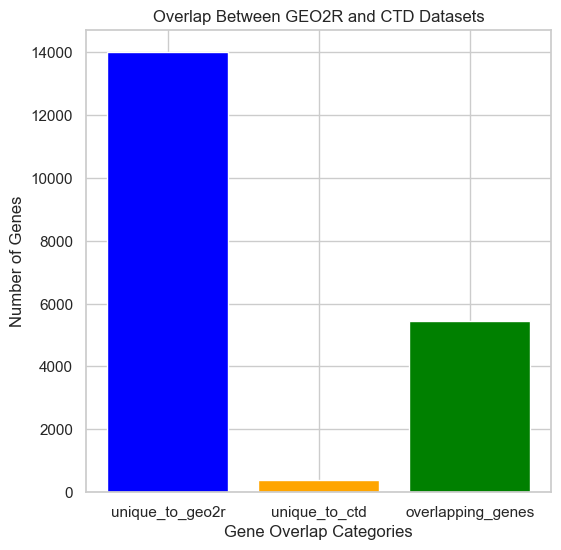

In [ ]:
import pandas as pd

# Step 1: Load GEO2R and CTD datasets
geo2r_path = r"C:\Users\agk78\OneDrive\Desktop\AFL\.venv\processed_\Compiled_GEO2R.csv"  # Replace with your GEO2R file path
ctd_path = r"C:\Users\agk78\OneDrive\Desktop\AFL\.venv\processed_\Preprocessed_CTD_Data1.csv"      # Replace with your CTD file path

geo2r_data = pd.read_csv(geo2r_path)
ctd_data = pd.read_csv(ctd_path)

# Step 2: Inspect the datasets (Optional)
print("GEO2R Dataset Head:")
print(geo2r_data.head())
print("\nCTD Dataset Head:")
print(ctd_data.head())

# Step 3: Rename relevant columns for consistency
ctd_data.rename(columns={"Inference Network": "Gene.symbol"}, inplace=True)

# Step 4: Merge datasets (Outer Join on 'Gene.symbol')
merged_data = pd.merge(geo2r_data, ctd_data, on="Gene.symbol", how="outer")

# Step 5: Save merged dataset
output_file_path = "path_to_output_merged_file.csv"  # Replace with your desired output path
merged_data.to_csv(output_file_path, index=False)

print(f"Merged data saved to: {output_file_path}")

# Step 6: Analyze the merged dataset
# Example Analysis: Check for overlapping genes
geo2r_genes = set(geo2r_data['Gene.symbol'].dropna())
ctd_genes = set(ctd_data['Gene.symbol'].dropna())

overlapping_genes = geo2r_genes.intersection(ctd_genes)
unique_to_geo2r = geo2r_genes - ctd_genes
unique_to_ctd = ctd_genes - geo2r_genes

print(f"\nNumber of overlapping genes: {len(overlapping_genes)}")
print(f"Number of unique genes in GEO2R: {len(unique_to_geo2r)}")
print(f"Number of unique genes in CTD: {len(unique_to_ctd)}")

# Example Visualization (Optional, Requires matplotlib and seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot overlapping genes
venn_labels = {
    "unique_to_geo2r": len(unique_to_geo2r),
    "unique_to_ctd": len(unique_to_ctd),
    "overlapping_genes": len(overlapping_genes),
}

plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
plt.bar(venn_labels.keys(), venn_labels.values(), color=['blue', 'orange', 'green'])
plt.xlabel("Gene Overlap Categories")
plt.ylabel("Number of Genes")
plt.title("Overlap Between GEO2R and CTD Datasets")
plt.show()


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path =r'C:\Users\agk78\OneDrive\Desktop\AFL\.venv\path_to_output_merged_file.csv'
data = pd.read_csv(file_path)

# Step 1: Handle Missing Data
# Remove rows where critical columns have missing values
cleaned_data = data.dropna(subset=['Gene.symbol', 'Chemical Name', 'Disease Name', 'Inference Score', 'Normalized Inference Score']).copy()

# Step 2: Derive a Target Variable
# Categorize 'Normalized Inference Score' into 'low', 'medium', and 'high'
cleaned_data.loc[:, 'Toxicity_Level'] = pd.qcut(
    cleaned_data['Normalized Inference Score'],
    q=3,  # Divide into 3 categories
    labels=['Low', 'Medium', 'High']
)

# Step 3: Normalize Numerical Features
# Normalize 'Inference Score' and 'Normalized Inference Score'
scaler = MinMaxScaler()
cleaned_data[['Inference Score', 'Normalized Inference Score']] = scaler.fit_transform(
    cleaned_data[['Inference Score', 'Normalized Inference Score']]
)

# Display preprocessing results
print("Cleaned Data (first 5 rows):")
print(cleaned_data.head())

print("\nDistribution of Toxicity Levels:")
print(cleaned_data['Toxicity_Level'].value_counts())


Cleaned Data (first 5 rows):
            ID     adj.P.Val       P.Value Gene.symbol Chemical Name  \
0  A_23_P38816  6.723000e-01  4.310000e-01        A1BG  Aflatoxin B1   
1  A_23_P38816  6.723000e-01  4.310000e-01        A1BG  Aflatoxin B1   
2        25737  3.350000e-12  6.110000e-15        A1BG  Aflatoxin B1   
3        25737  3.350000e-12  6.110000e-15        A1BG  Aflatoxin B1   
8         7999  3.820000e-01  2.580000e-01         A2M  Aflatoxin B1   

                Disease Name  Inference Score  Normalized Inference Score  \
0               Hepatomegaly         0.018334                    0.018334   
1              Schizophrenia         0.109828                    0.109828   
2               Hepatomegaly         0.018334                    0.018334   
3              Schizophrenia         0.109828                    0.109828   
8  Carcinoma, Hepatocellular         0.501128                    0.501128   

  Toxicity_Level  
0         Medium  
1           High  
2         Medium  

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assume `cleaned_data` is already prepared from previous steps

# Step 1: One-Hot Encoding for Categorical Variables
categorical_columns = ['Chemical Name', 'Disease Name', 'Gene.symbol']
encoded_data = pd.get_dummies(cleaned_data, columns=categorical_columns, drop_first=True)

# Step 2: Feature Engineering
# Example: Interaction term between 'Inference Score' and 'Normalized Inference Score'
encoded_data['Interaction_Term'] = (
    encoded_data['Inference Score'] * encoded_data['Normalized Inference Score']
)

# Step 3: Split Data
# Separate features (X) and target variable (y)
X = encoded_data.drop(columns=['Toxicity_Level', 'ID'])  # Drop non-predictive columns
y = encoded_data['Toxicity_Level']

# Convert target variable to numerical format
y_encoded = y.map({'Low': 0, 'Medium': 1, 'High': 2})

# Split data into training, validation, and testing sets (60-20-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Summary of splits
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


Training set size: (60945, 10389)
Validation set size: (20315, 10389)
Test set size: (20315, 10389)


In [5]:
# Save training, validation, and test datasets to CSV files

# Save features and target for the training set
X_train.to_csv(r'C:\Users\agk78\OneDrive\Desktop\AFL\.venv\processed_\X_train.csv', index=False)
y_train.to_csv(r'C:\Users\agk78\OneDrive\Desktop\AFL\.venv\processed_\y_train.csv', index=False)

# Save features and target for the validation set
X_val.to_csv(r'C:\Users\agk78\OneDrive\Desktop\AFL\.venv\processed_\X_val.csv', index=False)
y_val.to_csv(r'C:\Users\agk78\OneDrive\Desktop\AFL\.venv\processed_\y_val.csv', index=False)

# Save features and target for the test set
X_test.to_csv(r'C:\Users\agk78\OneDrive\Desktop\AFL\.venv\processed_\X_test.csv', index=False)
y_test.to_csv(r'C:\Users\agk78\OneDrive\Desktop\AFL\.venv\processed_\y_test.csv', index=False)

print("Datasets saved successfully:")
print("- Training set: X_train.csv, y_train.csv")
print("- Validation set: X_val.csv, y_val.csv")
print("- Test set: X_test.csv, y_test.csv")


Datasets saved successfully:
- Training set: X_train.csv, y_train.csv
- Validation set: X_val.csv, y_val.csv
- Test set: X_test.csv, y_test.csv


code for combined datasets data 1 and data 2 donot run the code the file is already be saved 

In [ ]:
import pandas as pd

# Load the datasets
file_1_path = r'C:\Users\agk78\OneDrive\Desktop\AFL\cleaned_data.csv'  # Update to the actual path
file_2_path = r'C:\Users\agk78\OneDrive\Desktop\AFL\.venv\no1 datasets of aflatoxin b1\CTD_D016604_ixns_20241212063652.csv'  # Update to the actual path

data_1 = pd.read_csv(file_1_path)
data_2 = pd.read_csv(file_2_path)

# Ensure column names match for merging
data_2.rename(columns={'Gene Symbol': 'Gene.symbol', 'Chemical Name': 'Chemical Name'}, inplace=True)

# Perform an inner join on common columns: 'Gene.symbol' and 'Chemical Name'
combined_data = pd.merge(data_1, data_2, on=['Gene.symbol', 'Chemical Name'], how='inner')

# Save the combined dataset to a file
combined_file_path = r'C:\Users\agk78\OneDrive\Desktop\AFL\.venv\processed_\combined_dataafl.csv'  # Update to the desired save path
combined_data.to_csv(combined_file_path, index=False)

# Display some details about the combined dataset
print(f"Combined data has {combined_data.shape[0]} rows and {combined_data.shape[1]} columns.")
print(f"Combined dataset saved to: {combined_file_path}")
print(combined_data.head())


In [11]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

# Identify categorical and numerical columns
categorical_columns = ['Chemical Name', 'Gene.symbol', 'Disease Name', 'Interaction Actions']
numerical_columns = ['adj.P.Val', 'P.Value', 'Inference Score', 'Normalized Inference Score', 'Reference Count', 'Organism Count']

# Initialize sparse one-hot encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)

# Fit and transform the categorical columns
encoded_sparse = encoder.fit_transform(data[categorical_columns])

# Combine sparse encoded features with numerical features
X_sparse = hstack([encoded_sparse, data[numerical_columns]])

# Convert the target variable into numerical format
y = data['Toxicity_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Split the data into training, validation, and test sets
from sklearn.model_selection import train_test_split

X_train_sparse, X_temp_sparse, y_train, y_temp = train_test_split(
    X_sparse, y, test_size=0.4, random_state=42, stratify=y)

X_val_sparse, X_test_sparse, y_val, y_test = train_test_split(
    X_temp_sparse, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Save the sparse datasets to files
import joblib
joblib.dump(X_train_sparse,r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_train_sparse.pkl')
joblib.dump(X_val_sparse,r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_val_sparse.pkl')
joblib.dump(X_test_sparse,r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_test_sparse.pkl')
joblib.dump(y_train,r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_train.pkl')
joblib.dump(y_val,r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_val.pkl')
joblib.dump(y_test,r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_test.pkl')

print("Sparse datasets saved successfully:")
print("- Training set: X_train_sparse.pkl, y_train.pkl")
print("- Validation set: X_val_sparse.pkl, y_val.pkl")
print("- Test set: X_test_sparse.pkl, y_test.pkl")


Sparse datasets saved successfully:
- Training set: X_train_sparse.pkl, y_train.pkl
- Validation set: X_val_sparse.pkl, y_val.pkl
- Test set: X_test_sparse.pkl, y_test.pkl


In [2]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load the sparse datasets
X_train_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_train_sparse.pkl')
X_val_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_val_sparse.pkl')
X_test_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_test_sparse.pkl')
y_train = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_train.pkl')
y_val = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_val.pkl')
y_test = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_test.pkl')


# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_sparse = imputer.fit_transform(X_train_sparse)
X_val_sparse = imputer.transform(X_val_sparse)
X_test_sparse = imputer.transform(X_test_sparse)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_sparse, y_train)

# Evaluate on the validation set
y_val_pred = model.predict(X_val_sparse)

# Validation metrics
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred, target_names=['Low', 'Medium', 'High']))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = model.predict(X_test_sparse)

print("\nTest Set Performance:")
print(classification_report(y_test, y_test_pred, target_names=['Low', 'Medium', 'High']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Save the trained model
joblib.dump(model, r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\logistic_regression_model_imputed.pkl')
print("Model saved successfully: logistic_regression_model_imputed.pkl")


Validation Set Performance:
              precision    recall  f1-score   support

         Low       0.99      1.00      1.00     19864
      Medium       1.00      0.99      1.00     20489
        High       1.00      1.00      1.00     18809

    accuracy                           1.00     59162
   macro avg       1.00      1.00      1.00     59162
weighted avg       1.00      1.00      1.00     59162

Confusion Matrix:
[[19790    74     0]
 [  108 20381     0]
 [    0     0 18809]]

Test Set Performance:
              precision    recall  f1-score   support

         Low       0.99      1.00      0.99     19864
      Medium       1.00      0.99      0.99     20489
        High       1.00      1.00      1.00     18810

    accuracy                           1.00     59163
   macro avg       1.00      1.00      1.00     59163
weighted avg       1.00      1.00      1.00     59163

Confusion Matrix:
[[19780    84     0]
 [  129 20360     0]
 [    0     0 18810]]
Model saved successfull

In [12]:
import pandas as pd

# Path to the combined dataset
file_path = r'C:\Users\agk78\OneDrive\Desktop\AFL\.venv\processed_\combined_dataafl.csv'  # Update this path if needed
data = pd.read_csv(file_path)

# Display the first few rows to confirm
print(data.head())


            ID     adj.P.Val       P.Value Gene.symbol Chemical Name  \
0  A_23_P38816  6.723000e-01  4.310000e-01        A1BG  Aflatoxin B1   
1  A_23_P38816  6.723000e-01  4.310000e-01        A1BG  Aflatoxin B1   
2  A_23_P38816  6.723000e-01  4.310000e-01        A1BG  Aflatoxin B1   
3  A_23_P38816  6.723000e-01  4.310000e-01        A1BG  Aflatoxin B1   
4        25737  3.350000e-12  6.110000e-15        A1BG  Aflatoxin B1   

    Disease Name  Inference Score  Normalized Inference Score Toxicity_Level  \
0   Hepatomegaly         0.018334                    0.018334         Medium   
1   Hepatomegaly         0.018334                    0.018334         Medium   
2  Schizophrenia         0.109828                    0.109828           High   
3  Schizophrenia         0.109828                    0.109828           High   
4   Hepatomegaly         0.018334                    0.018334         Medium   

  Chemical ID     CAS RN  Gene ID  \
0     D016604  1162-65-8        1   
1     D01660

In [13]:
# Define the original categorical and numerical columns
categorical_columns = ['Chemical Name', 'Gene.symbol', 'Disease Name', 'Interaction Actions']
numerical_columns = ['adj.P.Val', 'P.Value', 'Inference Score', 
                     'Normalized Inference Score', 'Reference Count', 'Organism Count']


In [14]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)

# Fit the encoder on the categorical columns
encoder.fit(data[categorical_columns])

# Generate feature names
feature_names = encoder.get_feature_names_out(categorical_columns).tolist() + numerical_columns


In [15]:
import numpy as np

# Get model coefficients
coefficients = model.coef_

# Convert to absolute importance for all classes
importance = np.abs(coefficients).mean(axis=0)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display top 10 features
print("Top 10 Important Features:")
print(feature_importance.head(10))


Top 10 Important Features:
                                              Feature  Importance
10482                      Normalized Inference Score   15.037374
10481                                 Inference Score   15.037374
6702     Disease Name_Cell Transformation, Neoplastic    3.462473
9130   Disease Name_Non-alcoholic Fatty Liver Disease    3.343422
1                          Chemical Name_Aflatoxin B1    3.297589
6613            Disease Name_Carcinoma, Squamous Cell    3.233645
7191              Disease Name_Disease Models, Animal    3.214551
10227          Disease Name_Urinary Bladder Neoplasms    3.170903
6050                   Disease Name_Alzheimer Disease    3.065019
6842                   Disease Name_Colonic Neoplasms    2.900891


In [ ]:
path\to\filename

In [16]:
from sklearn.preprocessing import OneHotEncoder

# Define the original categorical columns
categorical_columns = ['Chemical Name', 'Gene.symbol', 'Disease Name', 'Interaction Actions']

# Recreate the encoder with the same settings
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)

# Fit the encoder on the original categorical columns from the dataset
encoder.fit(data[categorical_columns])

# Combine feature names
feature_names = encoder.get_feature_names_out(categorical_columns).tolist() + numerical_columns


In [17]:
import numpy as np

# Get feature importance from model coefficients
feature_names = encoder.get_feature_names_out(categorical_columns).tolist() + numerical_columns
coefficients = model.coef_

# Convert to absolute importance for all classes
importance = np.abs(coefficients).mean(axis=0)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display top 10 most important features
print("Top 10 Important Features:")
print(feature_importance.head(10))

# Optional: Save feature importance to a file
feature_importance.to_csv(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\feature_importance.csv', index=False)
print("Feature importance saved to: feature_importance.csv")


Top 10 Important Features:
                                              Feature  Importance
10482                      Normalized Inference Score   15.037374
10481                                 Inference Score   15.037374
6702     Disease Name_Cell Transformation, Neoplastic    3.462473
9130   Disease Name_Non-alcoholic Fatty Liver Disease    3.343422
1                          Chemical Name_Aflatoxin B1    3.297589
6613            Disease Name_Carcinoma, Squamous Cell    3.233645
7191              Disease Name_Disease Models, Animal    3.214551
10227          Disease Name_Urinary Bladder Neoplasms    3.170903
6050                   Disease Name_Alzheimer Disease    3.065019
6842                   Disease Name_Colonic Neoplasms    2.900891
Feature importance saved to: feature_importance.csv


In [4]:

import numpy as np
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train_sparse, y_train, cv=5, scoring='accuracy')

print("5-Fold Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


5-Fold Cross-Validation Accuracy Scores: [0.9961688  0.99647858 0.99577429 0.99676029 0.99591515]
Mean Accuracy: 0.996219420408495


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load the sparse datasets
X_train_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_train_sparse.pkl')
X_val_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_val_sparse.pkl')
X_test_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_test_sparse.pkl')
y_train = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_train.pkl')
y_val = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_val.pkl')
y_test = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_test.pkl')


# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_sparse = imputer.fit_transform(X_train_sparse)
X_val_sparse = imputer.transform(X_val_sparse)
X_test_sparse = imputer.transform(X_test_sparse)
# Train k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_sparse, y_train)

# Evaluate k-NN
y_val_pred_knn = knn_model.predict(X_val_sparse)
print("k-NN - Validation Performance")
print(classification_report(y_val, y_val_pred_knn))
print(confusion_matrix(y_val, y_val_pred_knn))


k-NN - Validation Performance
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19864
           1       0.98      0.98      0.98     20489
           2       0.99      0.99      0.99     18809

    accuracy                           0.98     59162
   macro avg       0.98      0.98      0.98     59162
weighted avg       0.98      0.98      0.98     59162

[[19512   279    73]
 [  369 20075    45]
 [   50   117 18642]]


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Perform Grid Search
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy')
knn_grid.fit(X_train_sparse, y_train)

# Best k-value
print(f"Best k-value: {knn_grid.best_params_}")


Best k-value: {'n_neighbors': 3}


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize k-NN with the best k-value
knn_best = KNeighborsClassifier(n_neighbors=3)

# Train k-NN
knn_best.fit(X_train_sparse, y_train)

# Evaluate on the validation set
y_val_pred_knn_best = knn_best.predict(X_val_sparse)

# Print performance metrics
print("k-NN (k=3) - Validation Performance")
print(classification_report(y_val, y_val_pred_knn_best))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_knn_best))


k-NN (k=3) - Validation Performance
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     19864
           1       0.98      0.98      0.98     20489
           2       1.00      0.99      0.99     18809

    accuracy                           0.99     59162
   macro avg       0.99      0.99      0.99     59162
weighted avg       0.99      0.99      0.99     59162

Confusion Matrix:
[[19580   236    48]
 [  315 20129    45]
 [   40    81 18688]]


In [2]:
import joblib

# Load the saved k-NN model
knn_model = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\knn_best_model.pkl')

print("k-NN model loaded successfully!")


k-NN model loaded successfully!


In [4]:
import joblib

# Load the preprocessed test feature data (X_test_sparse)
X_test_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_test_sparse.pkl')

# Load the test target labels (y_test)
y_test = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_test.pkl')

print("Test data loaded successfully!")
print(f"X_test_sparse shape: {X_test_sparse.shape}")
print(f"y_test shape: {y_test.shape}")


Test data loaded successfully!
X_test_sparse shape: (59163, 10485)
y_test shape: (59163,)


In [6]:
from sklearn.impute import SimpleImputer
from scipy.sparse import csr_matrix

# Initialize the imputer (mean strategy)
imputer = SimpleImputer(strategy='mean')

# Impute missing values in sparse matrix
X_test_sparse_imputed = imputer.fit_transform(X_test_sparse)

# Ensure it's still in sparse format
X_test_sparse_imputed = csr_matrix(X_test_sparse_imputed)

print("Missing values imputed successfully!")


Missing values imputed successfully!


In [9]:
import numpy as np
from scipy.sparse import csr_matrix

# Convert sparse matrix to dense to handle NaNs
X_test_dense = X_test_sparse.toarray()

# Identify rows without NaNs
non_nan_indices = ~np.isnan(X_test_dense).any(axis=1)

# Filter out rows with NaNs and convert back to sparse format
X_test_sparse_cleaned = csr_matrix(X_test_dense[non_nan_indices])

# Ensure corresponding labels are also filtered
y_test_cleaned = y_test[non_nan_indices]

print(f"Rows with NaNs removed. Remaining rows: {X_test_sparse_cleaned.shape[0]}")


Rows with NaNs removed. Remaining rows: 58764


In [10]:
# Predict using cleaned data
y_test_pred_knn = knn_model.predict(X_test_sparse_cleaned)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix

print("k-NN (k=3) - Test Performance (After Removing NaNs)")
print(classification_report(y_test_cleaned, y_test_pred_knn))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_cleaned, y_test_pred_knn))


k-NN (k=3) - Test Performance (After Removing NaNs)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     19763
           1       0.99      0.98      0.98     20334
           2       0.99      0.99      0.99     18667

    accuracy                           0.99     58764
   macro avg       0.99      0.99      0.99     58764
weighted avg       0.99      0.99      0.99     58764

Confusion Matrix:
[[19516   183    64]
 [  292 19996    46]
 [   36    92 18539]]


In [4]:
import joblib

# Save the optimized k-NN model
joblib.dump(knn_best,r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\knn_best_model.pkl')
print("Optimized k-NN model saved successfully: knn_best_model.pkl")


Optimized k-NN model saved successfully: knn_best_model.pkl


In [6]:
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load the sparse datasets
X_train_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_train_sparse.pkl')
X_val_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_val_sparse.pkl')
X_test_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_test_sparse.pkl')
y_train = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_train.pkl')
y_val = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_val.pkl')
y_test = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_test.pkl')


# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_sparse = imputer.fit_transform(X_train_sparse)
X_val_sparse = imputer.transform(X_val_sparse)
X_test_sparse = imputer.transform(X_test_sparse)

# Initialize and train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_sparse, y_train)

# Evaluate XGBoost
y_val_pred_xgb = xgb_model.predict(X_val_sparse)

# Print results
print("XGBoost - Validation Performance")
print(classification_report(y_val, y_val_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_xgb))


c:\Users\agk78\OneDrive\Desktop\AFL\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:13:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Validation Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19864
           1       1.00      1.00      1.00     20489
           2       1.00      1.00      1.00     18809

    accuracy                           1.00     59162
   macro avg       1.00      1.00      1.00     59162
weighted avg       1.00      1.00      1.00     59162

Confusion Matrix:
[[19864     0     0]
 [    0 20489     0]
 [    0     0 18809]]


In [7]:
y_test_pred_xgb = xgb_model.predict(X_test_sparse)

print("XGBoost - Test Performance")
print(classification_report(y_test, y_test_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_xgb))


XGBoost - Test Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19864
           1       1.00      1.00      1.00     20489
           2       1.00      1.00      1.00     18810

    accuracy                           1.00     59163
   macro avg       1.00      1.00      1.00     59163
weighted avg       1.00      1.00      1.00     59163

Confusion Matrix:
[[19864     0     0]
 [    0 20489     0]
 [    0     0 18810]]


In [8]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb_model,r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\xgboost_best_model.pkl')

print("XGBoost model saved successfully: xgboost_best_model.pkl")


XGBoost model saved successfully: xgboost_best_model.pkl


In [11]:
from lightgbm import LGBMClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load the sparse datasets
X_train_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_train_sparse.pkl')
X_val_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_val_sparse.pkl')
X_test_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_test_sparse.pkl')
y_train = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_train.pkl')
y_val = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_val.pkl')
y_test = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_test.pkl')


# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_sparse = imputer.fit_transform(X_train_sparse)
X_val_sparse = imputer.transform(X_val_sparse)
X_test_sparse = imputer.transform(X_test_sparse)

# Initialize and train LightGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_sparse, y_train)

# Evaluate LightGBM
y_val_pred_lgbm = lgbm_model.predict(X_val_sparse)

# Print results
print("LightGBM - Validation Performance")
print(classification_report(y_val, y_val_pred_lgbm))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_lgbm))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.640535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4522
[LightGBM] [Info] Number of data points in the train set: 177486, number of used features: 1758
[LightGBM] [Info] Start training from score -1.091370
[LightGBM] [Info] Start training from score -1.060391
[LightGBM] [Info] Start training from score -1.145944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [12]:
y_test_pred_lgbm = lgbm_model.predict(X_test_sparse)

print("LightGBM - Test Performance")
print(classification_report(y_test, y_test_pred_lgbm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_lgbm))


LightGBM - Test Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19864
           1       1.00      1.00      1.00     20489
           2       1.00      1.00      1.00     18810

    accuracy                           1.00     59163
   macro avg       1.00      1.00      1.00     59163
weighted avg       1.00      1.00      1.00     59163

Confusion Matrix:
[[19864     0     0]
 [    0 20489     0]
 [    0     0 18810]]


In [14]:
import joblib

# Save the trained LightGBM model
joblib.dump(lgbm_model,r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\lightgbm_best_model.pkl')

print("LightGBM model saved successfully: lightgbm_best_model.pkl")


LightGBM model saved successfully: lightgbm_best_model.pkl


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load the sparse datasets
X_train_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_train_sparse.pkl')
X_val_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_val_sparse.pkl')
X_test_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_test_sparse.pkl')
y_train = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_train.pkl')
y_val = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_val.pkl')
y_test = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_test.pkl')


# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_sparse = imputer.fit_transform(X_train_sparse)
X_val_sparse = imputer.transform(X_val_sparse)
X_test_sparse = imputer.transform(X_test_sparse)
# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_sparse, y_train)

# Evaluate Random Forest
y_val_pred_rf = rf_model.predict(X_val_sparse)

# Print results
print("Random Forest - Validation Performance")
print(classification_report(y_val, y_val_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_rf))


Random Forest - Validation Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19864
           1       1.00      1.00      1.00     20489
           2       1.00      1.00      1.00     18809

    accuracy                           1.00     59162
   macro avg       1.00      1.00      1.00     59162
weighted avg       1.00      1.00      1.00     59162

Confusion Matrix:
[[19864     0     0]
 [    0 20489     0]
 [    0     0 18809]]


In [15]:
y_test_pred_rf = rf_model.predict(X_test_sparse)

print("Random Forest - Test Performance")
print(classification_report(y_test, y_test_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))


Random Forest - Test Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19864
           1       1.00      1.00      1.00     20489
           2       1.00      1.00      1.00     18810

    accuracy                           1.00     59163
   macro avg       1.00      1.00      1.00     59163
weighted avg       1.00      1.00      1.00     59163

Confusion Matrix:
[[19864     0     0]
 [    0 20489     0]
 [    0     0 18810]]


In [17]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model,r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\random_forest_best_model.pkl')

print("Random Forest model saved successfully: random_forest_best_model.pkl")


Random Forest model saved successfully: random_forest_best_model.pkl


In [1]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load the sparse datasets
X_train_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_train_sparse.pkl')
X_val_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_val_sparse.pkl')
X_test_sparse = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\X_test_sparse.pkl')
y_train = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_train.pkl')
y_val = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_val.pkl')
y_test = joblib.load(r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\y_test.pkl')


# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_sparse = imputer.fit_transform(X_train_sparse)
X_val_sparse = imputer.transform(X_val_sparse)
X_test_sparse = imputer.transform(X_test_sparse)

# Train CatBoost
cat_model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=100, random_state=42)
cat_model.fit(X_train_sparse, y_train)

# Evaluate
y_val_pred_cat = cat_model.predict(X_val_sparse)

print("CatBoost - Validation Performance")
print(classification_report(y_val, y_val_pred_cat))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_cat))


0:	learn: 0.9097917	total: 287ms	remaining: 2m 23s
100:	learn: 0.0000734	total: 9.69s	remaining: 38.3s
200:	learn: 0.0000115	total: 19s	remaining: 28.3s
300:	learn: 0.0000064	total: 28.8s	remaining: 19s
400:	learn: 0.0000045	total: 39.1s	remaining: 9.64s
499:	learn: 0.0000035	total: 48.6s	remaining: 0us
CatBoost - Validation Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19864
           1       1.00      1.00      1.00     20489
           2       1.00      1.00      1.00     18809

    accuracy                           1.00     59162
   macro avg       1.00      1.00      1.00     59162
weighted avg       1.00      1.00      1.00     59162

Confusion Matrix:
[[19864     0     0]
 [    0 20489     0]
 [    0     0 18809]]


In [2]:
y_test_pred_cat = cat_model.predict(X_test_sparse)

print("CatBoost - Test Performance")
print(classification_report(y_test, y_test_pred_cat))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_cat))


CatBoost - Test Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19864
           1       1.00      1.00      1.00     20489
           2       1.00      1.00      1.00     18810

    accuracy                           1.00     59163
   macro avg       1.00      1.00      1.00     59163
weighted avg       1.00      1.00      1.00     59163

Confusion Matrix:
[[19864     0     0]
 [    0 20489     0]
 [    0     0 18810]]


In [3]:
import joblib

# Save the trained CatBoost model
joblib.dump(cat_model,r'C:\Users\agk78\OneDrive\Desktop\AFL\processed_files\catboost_best_model.pkl')

print("CatBoost model saved successfully: catboost_best_model.pkl")


CatBoost model saved successfully: catboost_best_model.pkl
